# PASSION demo part 3/3:
## Rooftops and sections dataset generation

In this notebook, the detection of rooftops after the segmentation and its division into rooftop sections is performed. Two CSV files are generated:  
    - Rooftops CSV: takes the segmentation and divides it into the single detected rooftops, filtering and simplifying them but without conducting any morphology analysis.  
    - Sections CSV: takes the rooftops CSV and analyses the images in order to extract information about the rooftop morphology and divide it into sections.  

In [1]:
import passion

Segmentation Models: using `keras` framework.
Error while importing RESKit. Package is not available in Windows. Continuing with the rest of submodules...


The input path of the segmented (model or OSM) data, and the output path for the CSV.  
Also, the file for the tilts distribution generated by 00_generate_aachen must be specified.

In [2]:
import pathlib

predictions_path = pathlib.Path('F:\datasets/passion/segmented')
output_path = pathlib.Path('F:\datasets/passion/buildings')
tilt_distribution_path = pathlib.Path('F:\datasets/passion/tilt_distribution.pkl')

In [3]:
# takes longer because of writing all building images to disk!
# can deactivate with save_images=False
# also, probably vectorizing the solution in some way would make it much faster
passion.buildings.rooftop_analysis.generate_rooftops(predictions_path, output_path)

9it [00:43,  4.83s/it]


#### Results

Sample image of one of the rooftops stored in the 'rooftops' folder. The name of the image is linked to the rooftop in the CSV file.

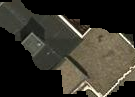

In [5]:
import PIL

paths = list((output_path / 'rooftops').glob('*.png'))
img = PIL.Image.open(paths[16])

img

In [6]:
passion.buildings.section_analysis.generate_sections(output_path, output_path, tilt_distribution_path)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 703/703 [01:51<00:00,  6.29it/s]


#### Results

Sample image of one of the sections stored in the 'sections' folder. The name of the image is linked to the section in the CSV file.

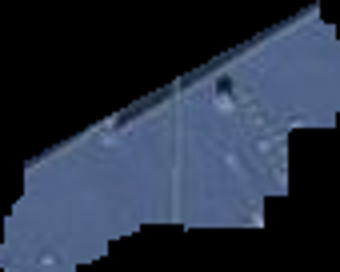

In [7]:
import PIL

paths = list((output_path / 'sections').glob('*.png'))
img = PIL.Image.open(paths[76])

img.resize((img.size[0]*4, img.size[1]*4))